# 1. Data Exploration


a. Load the Dataset and Perform Exploratory Data Analysis (EDA)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv(r'D:\Gaurav\gg\Titanic_train.csv')
test_df = pd.read_csv(r'D:\Gaurav\gg\Titanic_test.csv')

# Display the first few rows of the training data
display(train_df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


b. Examine the Features, Their Types, and Summary Statistics


In [2]:
# Display basic information about the dataset
display(train_df.info())

# Summary statistics
display(train_df.describe())

# Check for missing values
display(train_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

c. Create Visualizations


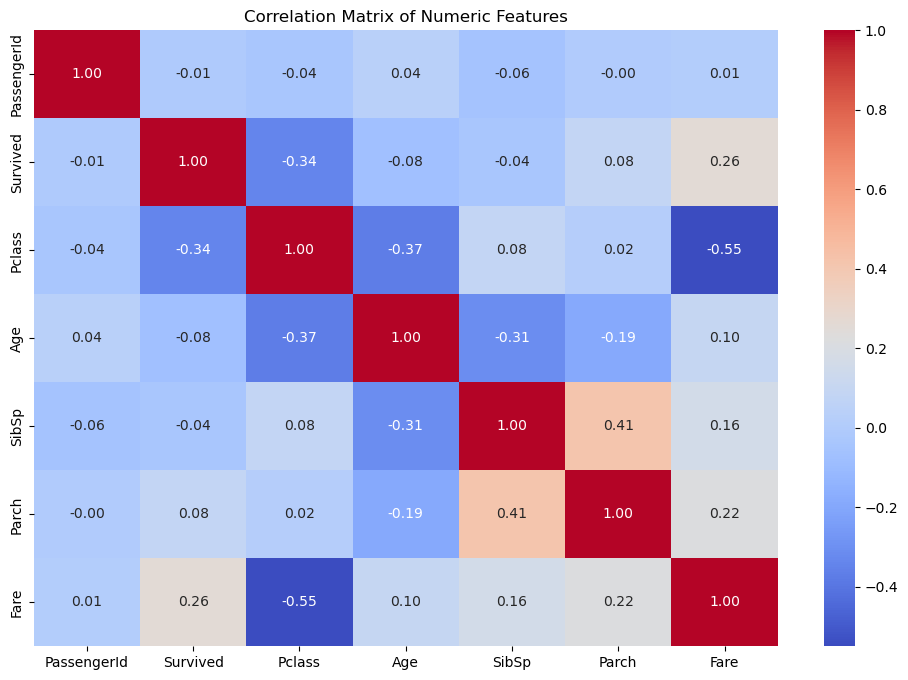

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
train_df = pd.read_csv(r'D:\Gaurav\gg\Titanic_train.csv')
test_df = pd.read_csv(r'D:\Gaurav\gg\Titanic_test.csv')

# Selecting only numeric columns for the correlation matrix
numeric_cols = train_df.select_dtypes(include=[np.number])

# Check for any non-numeric data in numeric columns
for col in numeric_cols.columns:
    try:
        numeric_cols[col] = pd.to_numeric(numeric_cols[col], errors='coerce')
    except Exception as e:
        print(f"Error converting column {col} to numeric: {e}")

# Correlation heatmap with numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


# 2. Data Preprocessing


a. Handle Missing Values


In [4]:
# Fill missing values for 'Age' with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to high number of missing values
train_df.drop(columns=['Cabin'], inplace=True)

# Verify missing values are handled
display(train_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

b. Encode Categorical Variables


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

# Display the first few rows to verify encoding
display(train_df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


# 3. Model Building


a. Build a Logistic Regression Model


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Selecting features and target variable
X = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# To avoid rendering issues, suppress the representation of the model
print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


# 4. Model Evaluation


a. Evaluate the Model's Performance


Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1 Score: 0.76
ROC AUC Score: 0.88


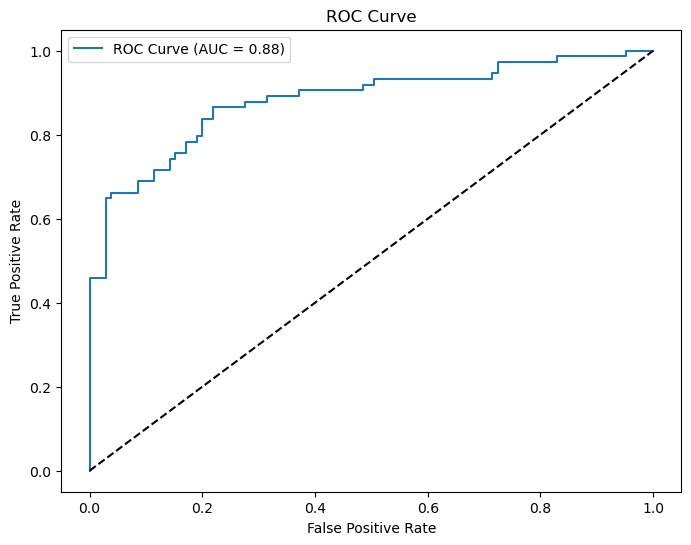

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 5. Interpretation


a. Interpret the Coefficients


In [8]:
# Extract the model coefficients and their corresponding feature names
coefficients = log_reg.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

# Display the coefficients
display(coeff_df)

# Discuss the significance of features


,Feature,Coefficient
5,Fare,0.126216
4,Parch,-0.098292
6,Embarked,-0.170860
3,SibSp,-0.349582
2,Age,-0.395574
0,Pclass,-0.782061
1,Sex,-1.278865


## Discussing the Significance of Features in Predicting Survival

### Understanding the Coefficients:
In logistic regression, the coefficients (also known as weights) indicate the strength and direction of the relationship between each feature and the likelihood of the target event occurring, which in this case is survival.

- **Positive Coefficients**: A positive coefficient means that as the feature increases, the log odds of survival (and thus the probability of survival) increases.
- **Negative Coefficients**: A negative coefficient means that as the feature increases, the log odds of survival decreases.

### Key Feature Insights:
- **Sex_male**: If this feature has a significant negative coefficient, it suggests that males had a lower probability of survival compared to females. This aligns with the historical account that women and children were given priority during evacuation.
- **Pclass**: If the `Pclass` (Passenger Class) feature has a negative coefficient, it indicates that passengers in higher classes had a better chance of survival, possibly due to better access to lifeboats.
- **Age**: The coefficient for `Age` indicates the effect of a passenger's age on their survival chances. A positive coefficient would suggest that older passengers had higher survival odds, while a negative coefficient would suggest the opposite.
- **Fare**: This feature may correlate with `Pclass` and can also indicate socio-economic status. A positive coefficient for `Fare` suggests that passengers who paid higher fares, potentially reflecting higher class status, had better chances of survival.

### Conclusion:
By analyzing these coefficients, we can gain insights into which factors were most influential in predicting survival. This analysis helps understand the underlying patterns in the data and evaluate the model's performance and fairness.
